In [32]:
import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import numpy as np          # linear algebra
import pandas as pd         # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, \
     Dense, Input, Activation, Dropout, GlobalAveragePooling2D, AveragePooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import cv2
from cv2 import imread, resize 
from tensorflow.keras.optimizers import Adam
import os
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
df=pd.read_csv("E:\df_v4.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
0,905,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0
1,1381,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.74902,1.0,1
2,9447,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,6
3,4404,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,2
4,4809,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,7310,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,4
9586,2393,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.74902,1.0,1
9587,5969,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00000,0.0,3
9588,2965,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.74902,1.0,1


In [40]:
df_x=df.iloc[:,1:6401]
arr=[]
for i in range(9590):
    arr.append(np.array(df_x.iloc[i,:]).reshape(80,80)) 
arr

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 0.74901961,
         1.        ]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 

In [41]:
df_y=df.iloc[:,6401:]
df_y

,target
0,0
1,1
2,6
3,2
4,2
...,...
9585,4
9586,1
9587,3
9588,1


In [42]:
df_x.shape[1]

6400

In [43]:
model = Sequential()
        

model.add(Conv2D(filters = 64,
                kernel_size = (3,3),
                strides = (2, 2),
                activation = 'relu',
                input_shape = (80,80,1)))
    
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256,
                kernel_size = (3,3),
                strides = (2, 2),
                activation = 'relu'))
    
model.add(MaxPool2D(pool_size = (3, 3), strides = (1, 1)))
model.add(Dropout(0.6))

model.add(Conv2D(filters = 512,
                kernel_size = (3,3),
                strides = (2, 2),
                activation = 'relu'))
    
model.add(MaxPool2D(pool_size = (3, 3), strides = (1, 1)))
model.add(Dropout(0.8))
             
model.add(Flatten())  

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.7))


model.add(Dense(254, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))


             
# [+] 8th output layer
model.add(Dense(7, activation = 'softmax'))

In [44]:
arr=np.array(arr)
arr=arr.reshape(arr.shape[0],80,80,1).astype('float32')


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(arr,df_y["target"],test_size=0.2)

df1=pd.read_csv("test_data.csv")
df1=df1.drop(["Unnamed: 0"],axis=1)
x_train=arr
y_train=df["target"]
y_test=np.array(df1.target)
x_test=df1.drop(["target"],axis=1)
x_test=np.array(x_test).reshape(x_test.shape[0],80,80,1).astype('float32')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [46]:
batch_size = 32     
epochs = 10       
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = epochs,
                    batch_size = batch_size,validation_data=[x_test,y_test],
                    shuffle = True)


Epoch 1/10
240/240 [==============================] - 23s 92ms/step - loss: 1.4567 - accuracy: 0.3895 - val_loss: 1.2216 - val_accuracy: 0.4453
Epoch 2/10
240/240 [==============================] - 21s 88ms/step - loss: 0.8193 - accuracy: 0.6251 - val_loss: 0.4410 - val_accuracy: 0.7925
Epoch 3/10
240/240 [==============================] - 21s 87ms/step - loss: 0.3485 - accuracy: 0.8431 - val_loss: 0.1815 - val_accuracy: 0.8863
Epoch 4/10
240/240 [==============================] - 25s 106ms/step - loss: 0.2160 - accuracy: 0.8942 - val_loss: 0.1029 - val_accuracy: 0.9844
Epoch 5/10
240/240 [==============================] - 27s 110ms/step - loss: 0.1223 - accuracy: 0.9619 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 6/10
240/240 [==============================] - 21s 87ms/step - loss: 0.0455 - accuracy: 0.9889 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
240/240 [==============================] - 22s 90ms/step - loss: 0.0276 - accuracy: 0.9928 - val_loss: 1.2865e-04 - val_acc

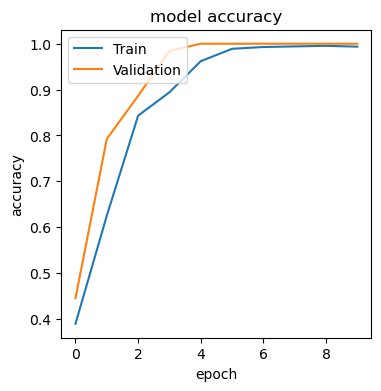

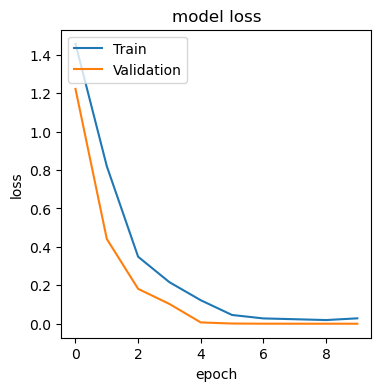

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.figure(figsize=(4, 4))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.figure(figsize=(4, 4))

In [48]:
x_test.shape

(1918, 80, 80, 1)

In [49]:
%%time
pred = model.predict_generator(x_test)


<timed exec>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Wall time: 858 ms


In [50]:
p=[]
for i in range(len(pred)):
    p.append(np.argmax(pred[i]))

In [51]:
confusion_matrix(y_test,p)

array([[272,   0,   0,   0,   0,   0,   0],
       [  0, 600,   0,   0,   0,   0,   0],
       [  0,   0, 197,   0,   0,   0,   0],
       [  0,   0,   0, 214,   0,   0,   0],
       [  0,   0,   0,   0, 254,   0,   0],
       [  0,   0,   0,   0,   0, 197,   0],
       [  0,   0,   0,   0,   0,   0, 184]], dtype=int64)

In [52]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       197
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00       254
           5       1.00      1.00      1.00       197
           6       1.00      1.00      1.00       184

    accuracy                           1.00      1918
   macro avg       1.00      1.00      1.00      1918
weighted avg       1.00      1.00      1.00      1918



In [53]:
test_df=pd.read_csv("test_data_v2.csv")
df_x=test_df.drop(["target","Unnamed: 0"],axis=1)

x_test_aug=[]

y_test_aug=test_df["target"]
for i in range(1000):
    x_test_aug.append(np.array(df_x.iloc[i,:]).reshape(80,80,1))


In [54]:
x_test_aug

[array([[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        ...,
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],
 
        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]]),
 array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
       

In [55]:
x_test_aug=np.array(x_test_aug).reshape(1000,80,80,1)

In [56]:
x_test_aug.shape

(1000, 80, 80, 1)

In [57]:
pred = model.predict_generator(x_test_aug)
p=[]
for i in range(len(pred)):
    p.append(np.argmax(pred[i]))

C:\Users\chait\AppData\Local\Temp\ipykernel_14416\106406068.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(x_test_aug)


In [58]:
confusion_matrix(y_test_aug,p)

array([[127,   0,   0,   0,   0,   0,   0],
       [  0,   0,  62,   0,   0,   0, 240],
       [  0,   0,  89,   0,   0,   0,   0],
       [  0,   0,   0, 116,   0,   0,   0],
       [  0,   0,   0,   0, 149,   0,   0],
       [  0,   0,   0,   0,   0, 114,   0],
       [  0,   0,   0,   0,   0,   0, 103]], dtype=int64)

In [59]:
print(classification_report(y_test_aug,p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.00      0.00      0.00       302
           2       0.59      1.00      0.74        89
           3       1.00      1.00      1.00       116
           4       1.00      1.00      1.00       149
           5       1.00      1.00      1.00       114
           6       0.30      1.00      0.46       103

    accuracy                           0.70      1000
   macro avg       0.70      0.86      0.74      1000
weighted avg       0.59      0.70      0.62      1000



C:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
1+

SyntaxError: invalid syntax (3589571888.py, line 1)

In [ ]:
model.save("cnn_model_v1")

In [ ]:
import joblib  
path="cnn_model_joblib_v1"
joblib.dump(model, path)

In [ ]:
#joblib.load(path)